In [1]:
import new_channels


channels = new_channels.main()

In [2]:
channels['Kv_1_1'].gates

{'m': {'constants_inf': [1.0, -30.5, -11.39343],
  'constants_tau': [30.0, -76.56, 26.1479],
  '_pow': 1,
  'inf_func': <function new_channels.inf_Kv__default(potential, gate_constants)>,
  'tau_func': <function new_channels.tau_Kv__default(potential, gate_constants)>,
  '_inf': array([0.01281034]),
  '_tau': array([15.98527424])},
 'h': {'constants_inf': [1.0, -30.0, 27.393],
  'constants_tau': [15000.0, -160.56, -100.0],
  '_pow': 2,
  'inf_func': <function new_channels.inf_Kv__default(potential, gate_constants)>,
  'tau_func': <function new_channels.tau_Kv__default(potential, gate_constants)>,
  '_inf': array([0.86119894]),
  '_tau': array([10367.56648905])}}

In [3]:
channels['Kv_1_1'].gates.keys()

dict_keys(['m', 'h'])

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

potenial = np.arange(-100, 100, 0.5)

In [5]:

# for channel in channels.keys() :
#     for gate_name in channels[channel].gates.keys() :
#         gate = channels[channel].gates[gate_name]
#         inf_data =gate["inf_func"](potenial, gate["constants_inf"])
#         label_str = f"{channel}_{gate_name}"
#         plt.plot(potenial, inf_data, label=label_str)

# plt.legend()

In [6]:
channels['Nav_1_3'].gates["m"]

{'_pow': 3,
 'alpha_func': <function new_channels.alpha_Nav(potential, gate_constants)>,
 'beta_func': <function new_channels.beta_Nav(potential: <built-in function array>, gate_constants)>,
 'alpha_parms': [0.182, -26, 9.0, 0.124],
 'beta_parms': [0.124, -26, 9.0, 0.124],
 '_tau': array([0.07593866]),
 '_inf': array([0.00185455])}

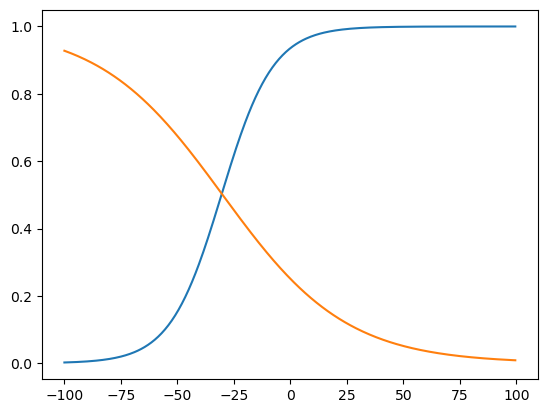

In [7]:
channel ="Kv_1_1"
for gate_name in channels[channel].gates.keys() :
    gate = channels[channel].gates[gate_name]
    inf_data =gate["inf_func"](potenial, gate["constants_inf"])
    label_str = f"{channel}_{gate_name}"
    plt.plot(potenial, inf_data, label=label_str)



Cav_2_2 m
Cav_2_2 h


Text(0.5, 1.0, 'tau')

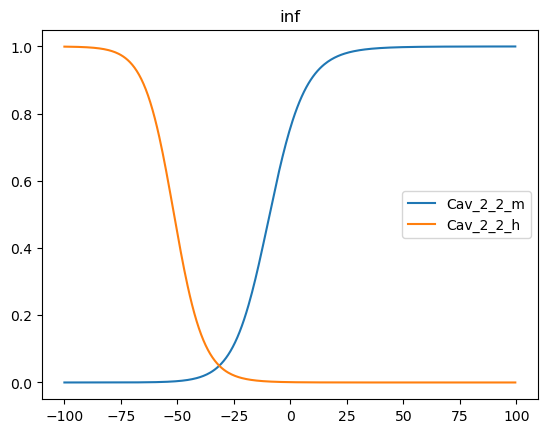

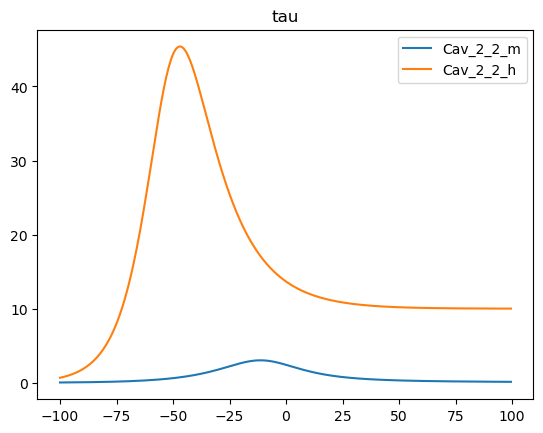

In [8]:

for channel in list(channels.keys())[13:14] :
    for gate_name in channels[channel].gates.keys() :
        print(channel , gate_name )
        inf_data, tau_data =channels[channel].inf_calc(gate_name, potenial)
        label_str = f"{channel}_{gate_name}"
        plt.figure(1)
        plt.plot(potenial, inf_data, label=label_str)
        plt.figure(2)
        plt.plot(potenial, tau_data, label=label_str)
    
plt.figure(1)
plt.legend()
plt.title("inf")
plt.figure(2)
plt.legend()
plt.title("tau")

In [9]:
list(channels.keys())

['Kv_1_1',
 'Kv_1_2',
 'Kv_1_3',
 'Kv_1_4',
 'Kv_1_5',
 'Kv_1_6',
 'Kv_2_1',
 'Kv_2_2',
 'Kv_3_1',
 'Kv_3_2',
 'Kv_4_2',
 'Nav_1_3',
 'Nav_1_6',
 'Cav_2_2',
 'Cav_3_1']

## Kv_1x 

In [10]:
ch_dict = {}
list(channels.keys())

for channel in list(channels.keys()):
    gate_dict = {}
    for gate_name in channels[channel].gates.keys() :
        #print(channel , gate_name )
        
        inf_data, tau_data =channels[channel].inf_calc(gate_name, potenial)
        gate_dict[gate_name] = [inf_data, tau_data]
        label_str = f"{channel}_{gate_name}"
        # plt.figure(1)
        # plt.plot(potenial, inf_data, label=label_str)
        # plt.figure(2)
        # plt.plot(potenial, tau_data, label=label_str)
    ch_dict[channel] = gate_dict
    
# plt.figure(1)
# plt.legend()
# plt.title("inf")
# plt.figure(2)
# plt.legend()
# plt.title("tau")

c:\Users\13108\Documents\GitHub\renshaw_models\new_channels.py:203: RuntimeWarning: invalid value encountered in divide
  beta= tmp5/tmp6


In [11]:
ch_list = list(ch_dict.keys())
#0 for inf 1 for tau: 
#ch_dict[ch_list[1]]["m"][1]

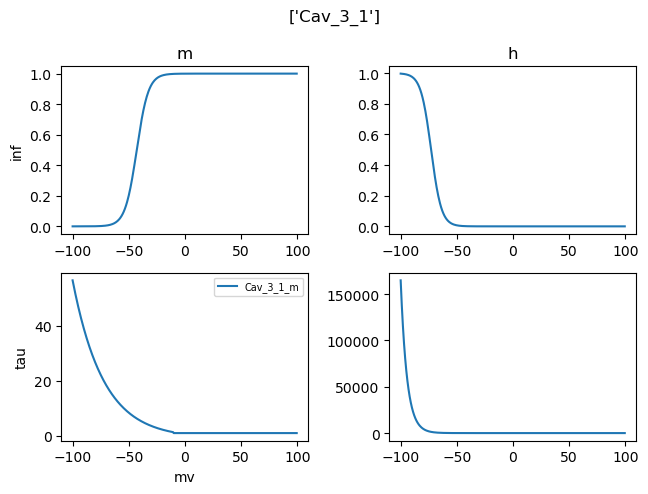

In [12]:
i = 14
end = 15
fig, axs = plt.subplots(2,2)
ch_list[i:end]
fig.suptitle(ch_list[i:end])
for ch_name in ch_list[i:end] :
    fig_c = 0
    
    for ch_gate in ch_dict[ch_name] :
        #plt.subplot(2, 2, fig_c)
        tmp_inf = ch_dict[ch_name][ch_gate][0]
        label_str = f"{ch_name}_{ch_gate}"
        axs[0,fig_c].plot(potenial, tmp_inf, label=label_str)
        axs[0,fig_c].set_title(ch_gate)
        

        tmp_tau = ch_dict[ch_name][ch_gate][1]
        axs[1,fig_c].plot(potenial, tmp_tau, label=label_str)
     
        fig_c += 1
    plt.tight_layout()
    axs[1,0].set_xlabel("mv")
    axs[0,0].set_ylabel("inf")
    axs[1,0].set_ylabel("tau")
    axs[1,0].legend(fontsize="x-small")


In [13]:
channels["Kv_1_1"].gates.keys()

dict_keys(['m', 'h'])

In [14]:
channels["Kv_1_1"].inf_calc("m", 80) 

array([0.99993863, 0.07511099])

In [15]:
channels["Kv_1_1"].inf_calc_all_gates(80)

array([[9.99938633e-01, 7.51109913e-02],
       [1.77123086e-02, 1.37588000e+04]])

In [16]:
channels["Kv_1_1"].gates.keys()

dict_keys(['m', 'h'])

In [17]:
for gate in channels["Kv_1_1"].gates.keys():
    print(gate)

m
h


In [42]:
tpm1, tmp2 = channels["Kv_1_1"].calc_dgate_dt(80, [20,500])

In [44]:
tpm1


-252.95980044107208

In [20]:
channels.keys()

dict_keys(['Kv_1_1', 'Kv_1_2', 'Kv_1_3', 'Kv_1_4', 'Kv_1_5', 'Kv_1_6', 'Kv_2_1', 'Kv_2_2', 'Kv_3_1', 'Kv_3_2', 'Kv_4_2', 'Nav_1_3', 'Nav_1_6', 'Cav_2_2', 'Cav_3_1'])

In [21]:
channels["Kv_1_1"]

In [22]:
desired_channels_name = ["Kv_1_1"]

In [23]:
channels["Kv_1_1"].num_gates

2

In [24]:
for channel in channels.keys() :
    print( channels[channel].num_gates)

2
2
2
2
2
2
2
2
1
1
2
2
1
2
2


In [47]:
data= np.array([1,2,3,4,5,6,7])

In [49]:
data[1:3] - data[2:4]

array([-1, -1])